# Takara Nishizaki

## Research Question: How do Red/Yellow cards affect the satisfaction and excitement of the fans watching the game in the stadium?

I would like to analyze the relationship between penalized cards and how satisfied or excited the fans get. For example, do fans get more excited when there are lot of cards and the game gets heated? I will analyze the relationship by looking at the cards statistic in the dataset, and comparing it with the match excitement statistics in the dataset which is rated out of 10. In addition to this, I will further look into how many fouls each team has commited to see if more fouls lead to an accumulation of cards. To visualize these information, I will make several plots that connect each of the variables that I am looking at, and making a joint plot at the end with the three variables to see the connection between all of the information. 

## **EDA on my dataset**  (Milestone 3, Task 1)

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#Downloading necessary dataset for project
df_all = pd.read_csv("../../Group14/data/raw/archive/matchesall2014-2020.csv")

In [3]:
#Looking at the shape and description of the dataset.

print (df_all.shape)
df_all.columns

(2660, 41)


Index(['Unnamed: 0', 'Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored

In [4]:
#Dropping columns that are not necessary for my research, then dropping any NA values.

df_subset = df_all[["Home Team", "Away Team", "Score", "Match Excitement", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards", "Away Team Fouls", "Away Team Yellow Cards", "Away Team Second Yellow Cards", "Away Team Red Cards", "year"]]
df_subset = df_subset.dropna()
df_subset


,Home Team,Away Team,Score,Match Excitement,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,year
0,MAN UTD,SWANSEA,1-2,5.9,14.0,2.0,0.0,0.0,20.0,4.0,0.0,0.0,2014
1,WEST BROM,SUNDERLAND,2-2,7.3,18.0,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2014
2,LEICESTER CITY,EVERTON,2-2,7.0,16.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2014
3,WEST HAM,TOTTENHAM,0-1,4.8,12.0,2.0,1.0,0.0,10.0,0.0,0.0,1.0,2014
4,QPR,HULL CITY,0-1,3.8,10.0,1.0,0.0,0.0,10.0,2.0,0.0,0.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,4.5,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2020
2656,SHEFFIELD UTD,BURNLEY,1-0,3.6,11.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,2020
2657,LEICESTER CITY,TOTTENHAM,2-4,8.7,9.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2020
2658,WEST HAM,SOUTHAMPTON,3-0,5.8,5.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,2020


There were no NA values in this dataset, so we now have a complete dataset with only the columns that are suitable for this research.

In [5]:
#Making a new column for my dataset that helps with my research.

df_subset["Total_Fouls"] = df_subset["Home Team Fouls"] + df_subset["Away Team Fouls"]
df_subset["Total_Yellow_Cards"] = df_subset["Home Team Yellow Cards"] + df_subset["Home Team Second Yellow Cards"] + df_subset["Away Team Yellow Cards"] + df_subset["Away Team Second Yellow Cards"]
df_subset["Total_Red_Cards"] = df_subset["Home Team Red Cards"] + df_subset["Away Team Red Cards"]

df_subset

,Home Team,Away Team,Score,Match Excitement,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,year,Total_Fouls,Total_Yellow_Cards,Total_Red_Cards
0,MAN UTD,SWANSEA,1-2,5.9,14.0,2.0,0.0,0.0,20.0,4.0,0.0,0.0,2014,34.0,6.0,0.0
1,WEST BROM,SUNDERLAND,2-2,7.3,18.0,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2014,27.0,4.0,0.0
2,LEICESTER CITY,EVERTON,2-2,7.0,16.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2014,26.0,2.0,0.0
3,WEST HAM,TOTTENHAM,0-1,4.8,12.0,2.0,1.0,0.0,10.0,0.0,0.0,1.0,2014,22.0,3.0,1.0
4,QPR,HULL CITY,0-1,3.8,10.0,1.0,0.0,0.0,10.0,2.0,0.0,0.0,2014,20.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,4.5,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2020,18.0,0.0,0.0
2656,SHEFFIELD UTD,BURNLEY,1-0,3.6,11.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,2020,12.0,4.0,0.0
2657,LEICESTER CITY,TOTTENHAM,2-4,8.7,9.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2020,17.0,2.0,0.0
2658,WEST HAM,SOUTHAMPTON,3-0,5.8,5.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,2020,14.0,3.0,0.0


I added three additional columns that might be helpful for this research. I have combined the fouls and cards statistics between the home and away teams, because we are looking at the game in total currently, and don't favour the home or away.

In [6]:
#Setting themes and styles for seaborn.

sns.set_theme(style="ticks")

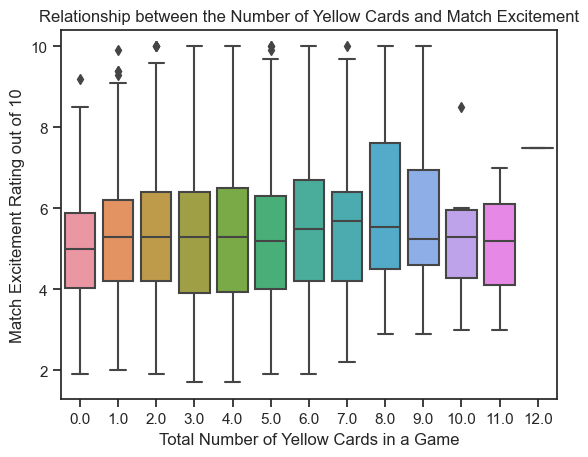

In [7]:
#Boxplot between total yellow cards and match excitement.

sns.boxplot(x='Total_Yellow_Cards', y='Match Excitement', data=df_subset)
plt.title("Relationship between the Number of Yellow Cards and Match Excitement")
plt.xlabel("Total Number of Yellow Cards in a Game")
plt.ylabel("Match Excitement Rating out of 10")
plt.show()

I wanted to see the correlation between the increased number of yellow cards, and if the match will be more heated, which will result to fans getting more excited. However, it seems that there are a slight increase, but it stays the same in general. There are a few outliers on the higher end of the match rating, which is probably caused through other variables that are not card related.

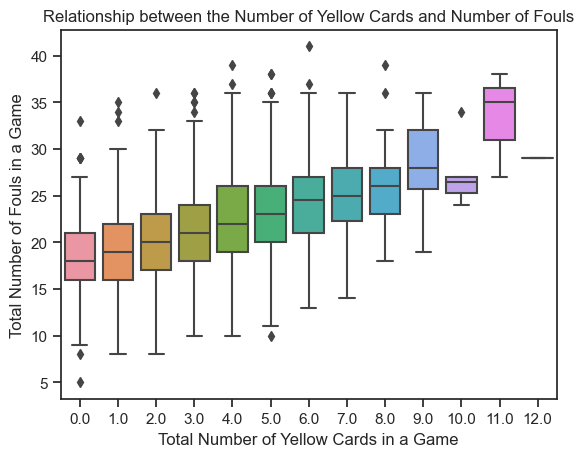

In [8]:
#Plot between total fouls and total yellow cards.

sns.boxplot(x='Total_Yellow_Cards', y='Total_Fouls', data=df_subset)
plt.title("Relationship between the Number of Yellow Cards and Number of Fouls")
plt.xlabel("Total Number of Yellow Cards in a Game")
plt.ylabel("Total Number of Fouls in a Game")
plt.show()

This boxplot shows the correlation between the number of yellow cards and the fouls committed by both teams. As the number of fouls increase, the amount of cards increase as well, because the referee wants to control the game better. Therefore, we can say that disciplinary actions are punished by cards and the players are penalized. 

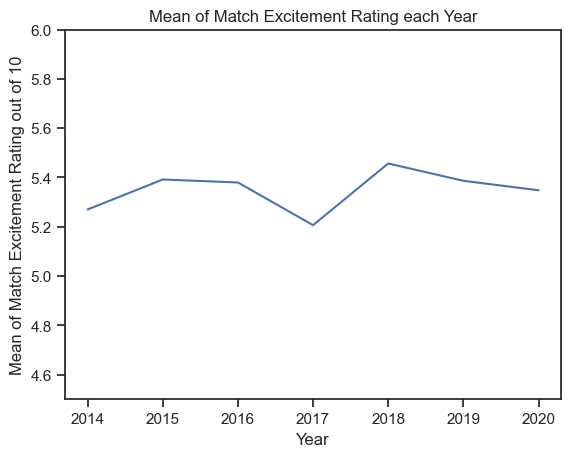

In [9]:
#Average match excitement rate by Year

mean_Excitement = df_subset.groupby('year')['Match Excitement'].mean()
mean_Excitement_df = mean_Excitement.to_frame().reset_index()
mean_Excitement_df.columns=["year", "mean"]
sns.lineplot(x='year', y='mean', data=mean_Excitement_df, markers=True)
plt.ylim([4.5,6])
plt.title("Mean of Match Excitement Rating each Year")
plt.xlabel("Year")
plt.ylabel("Mean of Match Excitement Rating out of 10")
plt.show()

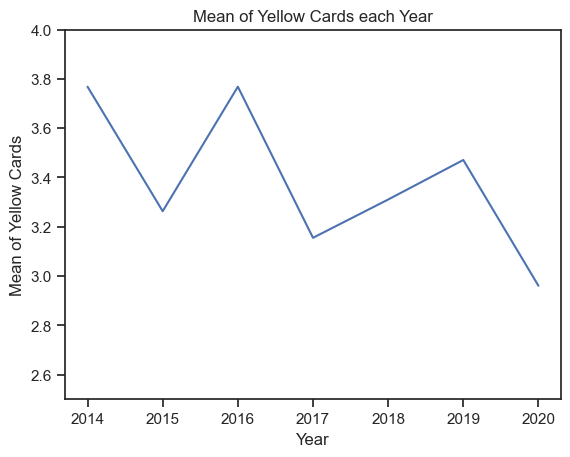

In [10]:
#Average cards given out by Year

mean_Yellow_Cards = df_subset.groupby('year')['Total_Yellow_Cards'].mean()
mean_Yellow_Cards_df = mean_Yellow_Cards.to_frame().reset_index()
mean_Yellow_Cards_df.columns=["year", "mean"]
sns.lineplot(x='year', y='mean', data=mean_Yellow_Cards_df, markers=True)
plt.ylim([2.5,4])
plt.title("Mean of Yellow Cards each Year")
plt.xlabel("Year")
plt.ylabel("Mean of Yellow Cards")
plt.show()

The two line plots above shows the mean of the match excitements and yellow cards by year. I created these line plots to see if there were any significant differences between each year. Every year has a different standard of refereeing and this could have caused how the games turned out. Overall, we can see that there are no significant differences. Although the plots do look like there are a big shift, it is because I have shrinked the scale on the y-axis to enhance the graphs.

## **Refining my Research Questions** (Milestone 3, Task 2)

Overall, the graphs have answered the simpler side of questions that I asked for my reseach project. I was able to drop columns that were unnecessary to my project. In addition to that, I have grouped several information by years, which I would later be able to compare by years.

Another perspective that I can see this is by the teams, because there are conspiracies where some teams are getting more advantages from referees while other teams struggle through this. I  would be able to test this by grouping the teams and looking at the card statistics to see if certain teams are favoured over another. 

On my next milestone, I will try to join all of the plots that I have made so far to see if I can see any further correlation between the columns that I have searched through as of now. 

## **Data Analysis Pipeline** (Milestone 4, Task 1)

In my previous milestone, I have done the first 4 common steps of data analysis pipeline. Therefore, I will explain in words about the different processing that I did.

First, we as a group looked into the data, and explained further about the 5 W's and how, in regards to this dataset. We have also identified the data format as well, which is located in the title page of our repository.

Secondly, for cleaning the data, we worked on these individually. Since my research focuses on the match excitement and its relationship with the cards given out during the game, I kept those columns along with the score and team names. This process decreased my dataset from 41 columns to 13, which simplified the dataset so it will be easier to work with. Additionally, I used the df.dropna code to drop any NA values, but since it was non existent in this dataset, I did not have to worry about the missing values.

Next, I created a couple columns that would be beneficiary for my research. I added the home and away yellow/red cards to create a new column named "Total Yellow Cards", and "Total Red Cards". Along with that, I also added the home and away fouls, to create a new column named "Total Fouls". These did not have any outliers because it includes all of the games from the regular season, so I did not have to exclude any rows/columns when dealing with this data.

Finally, as for grouping objects together using the groupby function, I did this when making the various plots of the latter part of Milestone 3. I grouped the years together so that I can see if there were any differences between the statistics per year, since referee standards can differ each year. Using the groupby function, I was able to plot the differences afterwards. 

## **Method Chaining** (Milestone 4, Task 2, Step 1)

In [11]:
#Beginning of Method Chaining

df_subset = (
    pd.read_csv("../../Group14/data/raw/archive/matchesall2014-2020.csv")
    .dropna()
    .assign(Total_Fouls=lambda x: x["Home Team Fouls"] + x["Away Team Fouls"])
    .assign(Total_Yellow_Cards=lambda x: x["Home Team Yellow Cards"] + x["Away Team Yellow Cards"])
    .assign(Total_Red_Cards=lambda x: x["Home Team Red Cards"] + x["Away Team Red Cards"])
    .loc[:, ["Home Team", "Away Team", "Score", "Match Excitement", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards", "Away Team Fouls", "Away Team Yellow Cards", "Away Team Second Yellow Cards", "Away Team Red Cards", "year", "Total_Fouls", "Total_Yellow_Cards", "Total_Red_Cards"]]
)
df_subset = pd.DataFrame(df_subset)
    

## **Importing Functions from the new .py file** (Milestone 4, Task 2, Step 3)

In [12]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions3
else:
    import sys
    sys.path.append("./code")
    import project_functions3
    
df_subset = project_functions3.load_and_process("../../Group14/data/raw/archive/matchesall2014-2020.csv")
df_subset

,Home Team,Away Team,Score,Match Excitement,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,year,Total_Fouls,Total_Yellow_Cards,Total_Red_Cards
0,MAN UTD,SWANSEA,1-2,5.9,14.0,2.0,0.0,0.0,20.0,4.0,0.0,0.0,2014,34.0,6.0,0.0
1,WEST BROM,SUNDERLAND,2-2,7.3,18.0,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2014,27.0,4.0,0.0
2,LEICESTER CITY,EVERTON,2-2,7.0,16.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2014,26.0,2.0,0.0
3,WEST HAM,TOTTENHAM,0-1,4.8,12.0,2.0,1.0,0.0,10.0,0.0,0.0,1.0,2014,22.0,2.0,1.0
4,QPR,HULL CITY,0-1,3.8,10.0,1.0,0.0,0.0,10.0,2.0,0.0,0.0,2014,20.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,4.5,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2020,18.0,0.0,0.0
2656,SHEFFIELD UTD,BURNLEY,1-0,3.6,11.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,2020,12.0,4.0,0.0
2657,LEICESTER CITY,TOTTENHAM,2-4,8.7,9.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2020,17.0,2.0,0.0
2658,WEST HAM,SOUTHAMPTON,3-0,5.8,5.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,2020,14.0,3.0,0.0


## **Further Analysis to my Research Question** (Milestone 4, Task 3)

    As mentioned in the reflection from my previous milestone, I am now curious if certain teams have an advantage over another team with the officiating, whether they receive more foul calls or penalized through cards. Now, I will group the teams together using the .groupby() function, then visualizing them with the amount of fouls called / yellow cards received. I am ommitting the red cards for this part of the research since it does not happen very often, and will be harder to see the contrast between the teams in that perspective. 

/Users/takaranishizaki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/takaranishizaki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 93.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/takaranishizaki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/takaranishizaki/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 94.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/takaranishizaki/m

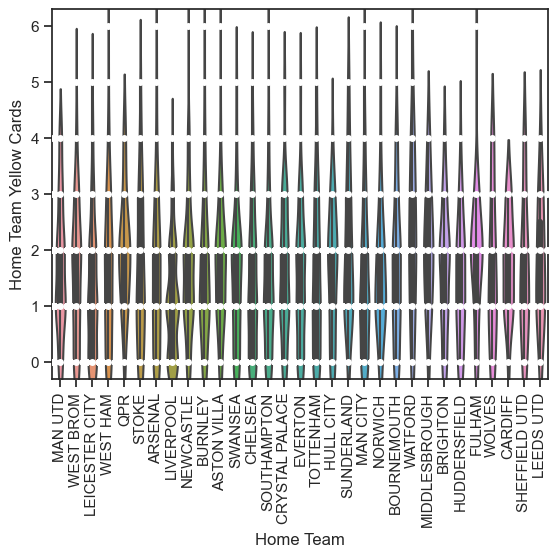

In [13]:
sns.violinplot(x='Home Team',y='Home Team Yellow Cards',data=df_subset)
sns.swarmplot(x='Home Team',y='Home Team Yellow Cards',data=df_subset, color='white')
plt.xticks(rotation=90)
plt.show()

I wanted to try using a swarm plot to see the average of all the teams, while also being able to look at the concentrated areas. However, it was hard to visualize this because of the large data, which means that I have to simplify the visualization. Therefore, I will try a violin plot next to see if it will make any difference.

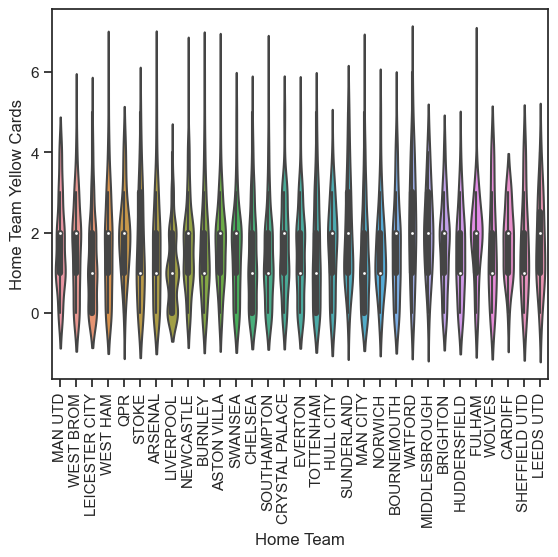

In [14]:
sns.violinplot(x='Home Team',y='Home Team Yellow Cards',data=df_subset)
plt.xticks(rotation=90)
plt.show()

I tried a violin plot to plot the fouls committed by team, but it is too complicated because the numbers are too similar to each other, and it is hard to see the variance between the teams. Obviously, it will not be that different from the previous plot since the dots from the swarm plot is the only component that is gone. Next, I will calculate the mean of yellow cards per team, and graph it as a simple point plot to get a simplified visualization and numbers. 

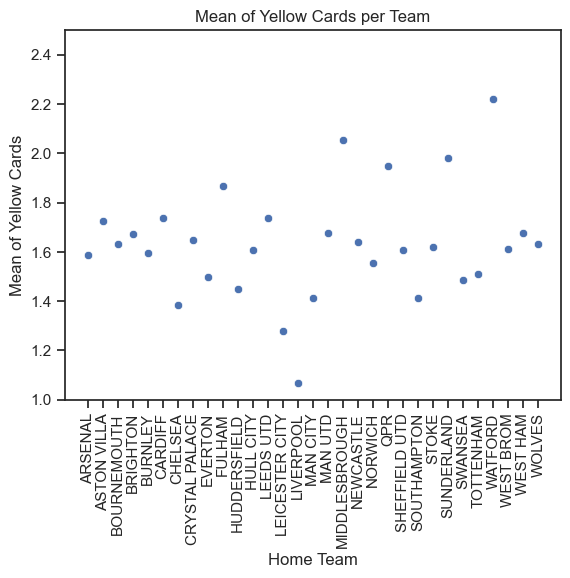

In [15]:
mean_team_Yellow_Cards = df_subset.groupby('Home Team')['Home Team Yellow Cards'].mean()
mean_team_Yellow_Cards_df = mean_team_Yellow_Cards.to_frame().reset_index()
mean_team_Yellow_Cards_df.columns=["Home Team", "mean"]
sns.scatterplot(x='Home Team', y='mean', data=mean_team_Yellow_Cards_df)
plt.xticks(rotation=90)
plt.title("Mean of Yellow Cards per Team")
plt.xlabel("Home Team")
plt.ylabel("Mean of Yellow Cards")
plt.ylim([1,2.5])
plt.show()

I have successfully made a plot where it is clear to see the mean of Yellow Cards per team. We can also see that Liverpool has the least yellow cards per game, and Watford has the most. Some reason behind this could be that Liverpool is a ball dominant team, leading to less time playing defense, not fouling as much and getting cards. On the other hand, Watford is a very aggressive team, and that could lead to them getting yellow cards more consistently compared to the other teams. 

Next, I will create a similar plot with the fouls committed, to see if there are any relationships between the fouls and yellow cards.

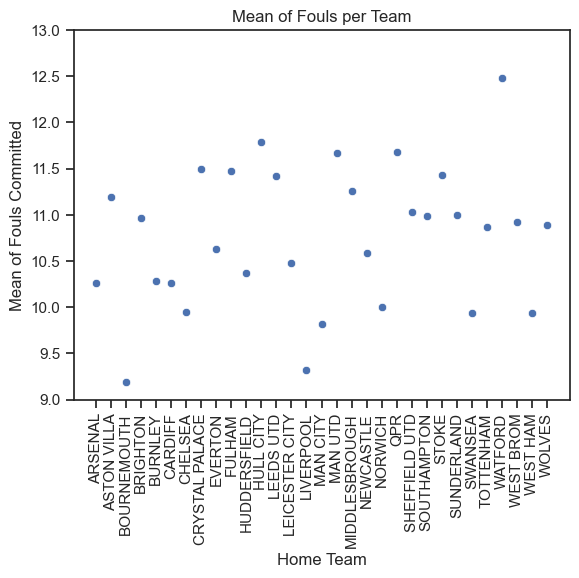

In [16]:
mean_team_Fouls = df_subset.groupby('Home Team')['Home Team Fouls'].mean()
mean_team_Fouls_df = mean_team_Fouls.to_frame().reset_index()
mean_team_Fouls_df.columns=["Home Team", "mean"]
sns.scatterplot(x='Home Team', y='mean', data=mean_team_Fouls_df)
plt.xticks(rotation=90)
plt.title("Mean of Fouls per Team")
plt.xlabel("Home Team")
plt.ylabel("Mean of Fouls Committed")
plt.ylim([9,13])
plt.show()

On this graph, I was able to obtain some interesting data that proves my point from my previous analysis. I am going to focus on Liverpool and Watford again, since they were to two extremes from the previous visualization. On here, we can see that Liverpool is the second least team to commit fouls, and Watford is the highest by far. Therefore, it can be said that the referee is more likely to give out yellow cards to players and teams when committing more fouls. Some reason behind this could be that the referee wants to control the game, and wants to slow down the players from being over aggressive to prevent players from getting injured. 

With the point proven that more fouls are likely to lead to yellow cards, I will attempt to combine these two statistics. 

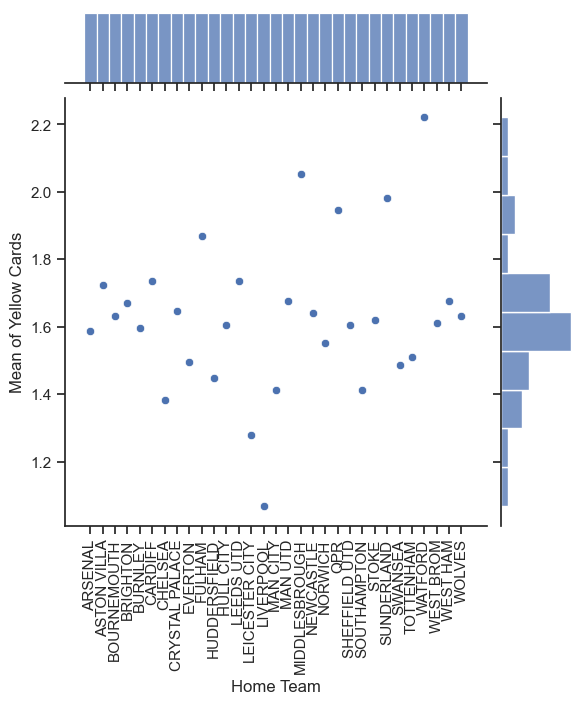

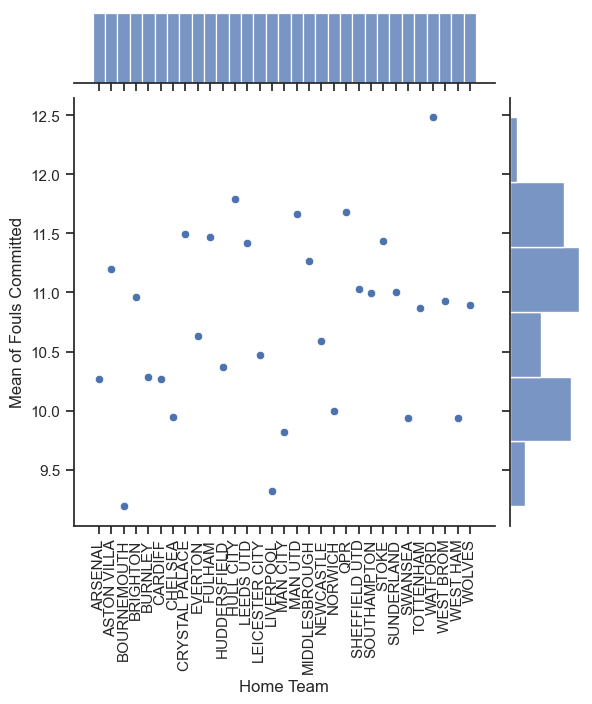

In [17]:
sns.jointplot(x='Home Team', y='mean', data=mean_team_Yellow_Cards_df)
plt.xticks(rotation=90)
plt.xlabel("Home Team")
plt.ylabel("Mean of Yellow Cards")
sns.jointplot(x='Home Team', y='mean', data=mean_team_Fouls_df)
plt.xticks(rotation=90)
plt.xlabel("Home Team")
plt.ylabel("Mean of Fouls Committed")
plt.show()

As we can see, the visuals compared the two data that I wanted to look into, but it failed to clearly prove my point. It is hard to understand how the two variables are correlated to each other. 

I will try to compare these with the match excitement statistics, which is what I wanted to research in the beginning. I will make a plot where the number of fouls and the match excitement are compared, in a swarm plot.

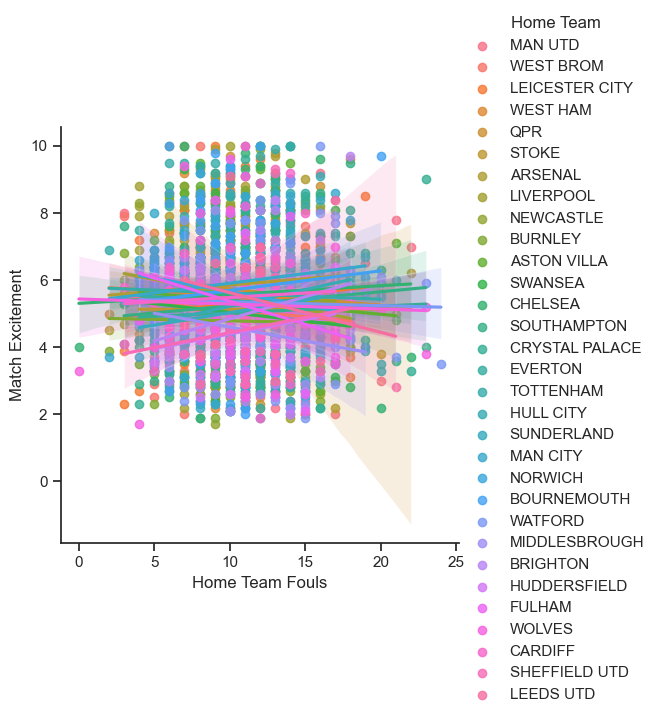

In [18]:
sns.lmplot(x='Home Team Fouls', y='Match Excitement', hue='Home Team', data=df_subset)
plt.show()

This is a good starting point to make my final visualization to answer my reasearch question. However, it is getting complicated because I added three variables in this plot; "Home Team", "Fouls", and "Match Excitement". Therefore, I will just compare the latter two regardless of the teams first.

In [19]:
#Calculating max and minimum values so that I can group them accordingly

max_value = df_subset['Total_Fouls'].max()
min_value = df_subset['Total_Fouls'].min()
print(max_value)
print(min_value)

41.0
5.0


Now that I have the max/min values calculated for the total fouls, I will now group them to categorize. Then, I will observe if more fouls tend to lead towards more match excitement from the fans. 

I am going to categorize the fouls from 0-10, 11-20, 21-30, and 31-41. I hope to see that the match excitement increases as the fouls increase as well.

In [20]:
#Categorizing Total Fouls column
threshold = 10
df_subset['categories_fouls'] = pd.cut(df_subset['Total_Fouls'], bins=[0, threshold, 2*threshold, 3*threshold, df_subset['Total_Fouls'].max()], labels=['0-10', '11-20', '21-30', '31-41'])

In [21]:
#Categorizing Match Excitement column
threshold = 2
df_subset['categories_Match_Excitement'] = pd.cut(df_subset['Match Excitement'], bins=[0, threshold, 2*threshold, 3*threshold, 4*threshold, df_subset['Match Excitement'].max()], labels=['0-2', '2.1-4', '4.1-6', '6.1-8', '8.1-10'])

In [22]:
df_subset

,Home Team,Away Team,Score,Match Excitement,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,year,Total_Fouls,Total_Yellow_Cards,Total_Red_Cards,categories_fouls,categories_Match_Excitement
0,MAN UTD,SWANSEA,1-2,5.9,14.0,2.0,0.0,0.0,20.0,4.0,0.0,0.0,2014,34.0,6.0,0.0,31-41,4.1-6
1,WEST BROM,SUNDERLAND,2-2,7.3,18.0,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2014,27.0,4.0,0.0,21-30,6.1-8
2,LEICESTER CITY,EVERTON,2-2,7.0,16.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2014,26.0,2.0,0.0,21-30,6.1-8
3,WEST HAM,TOTTENHAM,0-1,4.8,12.0,2.0,1.0,0.0,10.0,0.0,0.0,1.0,2014,22.0,2.0,1.0,21-30,4.1-6
4,QPR,HULL CITY,0-1,3.8,10.0,1.0,0.0,0.0,10.0,2.0,0.0,0.0,2014,20.0,3.0,0.0,11-20,2.1-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,4.5,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2020,18.0,0.0,0.0,11-20,4.1-6
2656,SHEFFIELD UTD,BURNLEY,1-0,3.6,11.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,2020,12.0,4.0,0.0,11-20,2.1-4
2657,LEICESTER CITY,TOTTENHAM,2-4,8.7,9.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2020,17.0,2.0,0.0,11-20,8.1-10
2658,WEST HAM,SOUTHAMPTON,3-0,5.8,5.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,2020,14.0,3.0,0.0,11-20,4.1-6


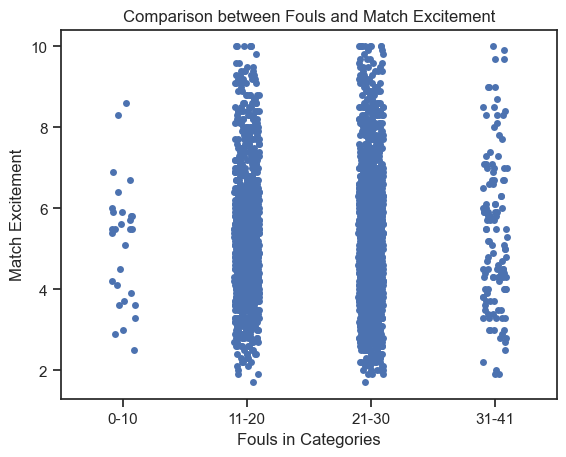

In [23]:
sns.stripplot(x='categories_fouls',y='Match Excitement',data=df_subset, jitter=True, dodge=True)
plt.title("Comparison between Fouls and Match Excitement")
plt.xlabel("Fouls in Categories")
plt.ylabel("Match Excitement")
plt.show()

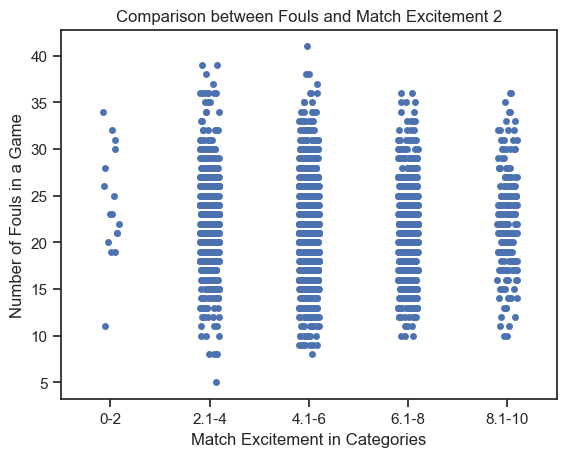

In [24]:
sns.stripplot(x='categories_Match_Excitement',y='Total_Fouls',data=df_subset, jitter=True, dodge=True)
plt.title("Comparison between Fouls and Match Excitement 2")
plt.xlabel("Match Excitement in Categories")
plt.ylabel("Number of Fouls in a Game")
plt.show()

The two plots above show the relationship between fouls and match excitement. I believe that the swarm plot was one of the best ways other than the violin plot to visualize a plot that answers my research question. We can see that there are not major differences between the fouls and how they affect/satisfy the fans that are watching the game. With these various plots that I have worked on during this task, I will be able to answer the research question that I came up with next week, using the Tableau dashboard. 

If I feel that there are more plots necessary to complete my project, I will add them accordingly before my presentation for the final milestone. 

## **Milestone 5**

In [25]:
#Converting my processed dataframe to a csv file so that I can use it in Tableau.

df_subset.to_csv('mydata.csv', index=False)